# data to hist

In [1]:
# import msprime
import matplotlib.pyplot as plt
# from sympy import symbols, exp
# from sympy.plotting import plot
# from datetime import datetime

In [2]:
# set parameters
# num of trials
num=100000
n_samples=2
# num of recombinations per base per gen
pi=1e-7
# pi = 1e-7/gen/base
s_len=5000
# R = 1e-3/gen
pop_size=20000
# \pi LN = 10/gen (~1/gen)

In [3]:
# import the data
with open("sim_data.txt", 'r') as txtfile:
    t_mrca_list_text=txtfile.read();
start=1;
t_mrca_list=[];
for idx in range(num):
    if idx<num-1:
        end=t_mrca_list_text.index(", ");
        t_mrca_list.append(float(t_mrca_list_text[start:end]))
        t_mrca_list_text=t_mrca_list_text[end+1:len(t_mrca_list_text)];
    else:
        t_mrca_list.append(float(t_mrca_list_text[start:len(t_mrca_list_text)-1]))

In [9]:
# measure in new time
t_mrca_list_rn = [t_mrca_list[idx]/pop_size for idx in range(num)]

Text(0.5, 0, 'Fastest Coalescent Time (generations)')

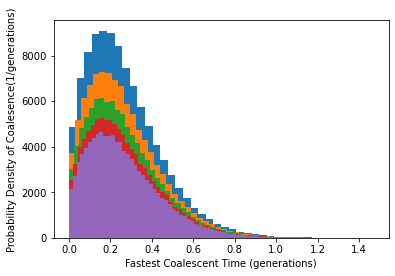

In [10]:
# find the best number of bins (wrt num)
plt.hist(t_mrca_list_rn, density=False, bins=40,range=(0,max(t_mrca_list_rn)))
plt.hist(t_mrca_list_rn, density=False, bins=50,range=(0,max(t_mrca_list_rn)))
plt.hist(t_mrca_list_rn, density=False, bins=60,range=(0,max(t_mrca_list_rn)))
plt.hist(t_mrca_list_rn, density=False, bins=70,range=(0,max(t_mrca_list_rn)))
plt.hist(t_mrca_list_rn, density=False, bins=80,range=(0,max(t_mrca_list_rn)))
plt.ylabel("Probability Density of Coalesence(1/generations)")
plt.xlabel("Fastest Coalescent Time (generations)")

In [11]:
# time list to histogram
def data2hist(data,n_bins):
    step_size = max(data)/n_bins
    time = [(idx+0.5)*step_size for idx in range(n_bins)]
    hist = [0 for idx in range(n_bins)]
    for idx in range(len(data)):
        bin_idx = int(data[idx]/step_size)
        if bin_idx == n_bins:
            bin_idx = bin_idx-1
        else:
            bin_idx = bin_idx
        hist[bin_idx] = hist[bin_idx]+1/len(data)/step_size
    return [time,hist]

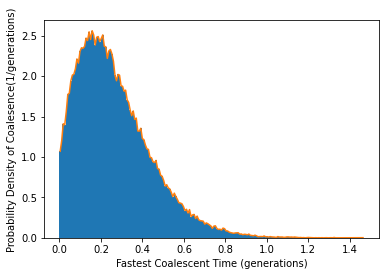

In [14]:
# convert data and see if it is reasonable
n_bins_used = 200 # 50
histdata = data2hist(t_mrca_list_rn,n_bins_used)
plt.hist(t_mrca_list_rn, density=True, bins=n_bins_used,range=(0,max(t_mrca_list_rn)))
plt.ylabel("Probability Density of Coalesence(1/generations)")
plt.xlabel("Fastest Coalescent Time (generations)")
plt.plot(histdata[0],histdata[1])

In [15]:
# save the data
with open("sim_hist.txt", 'w') as txtfile:
    txtfile.write(str(histdata))

# NonlinearModelFit in Mathematica

# run more simulations and see if the fit is good